<a href="https://colab.research.google.com/github/C-Little26/ECGR4105/blob/main/ECGR4105_Hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import dataset. Downloaded from Canvas
filepath = '/content/drive/My Drive/Machine Learning/Datasets/D3.csv'
dataset = pd.DataFrame(pd.read_csv(filepath))

In [ ]:
#Problem 1
#Breaking down dataset into separate columns
X1 = dataset.values[:,0]
X2 = dataset.values[:,1]
X3 = dataset.values[:,2]
Y = dataset.values[:, 3]
m = len(Y)#number of training samples
n = len(X1)#number of features

#create a column vector of ones for X0
X_0 = np.ones((m,1))

In [ ]:
X_1 = np.hstack((X_0,X1.reshape(m,1)))
X_2 = np.hstack((X_0,X2.reshape(m,1)))
X_3 = np.hstack((X_0,X3.reshape(m,1)))

In [ ]:
theta = np.zeros(2)
theta

array([0., 0.])

In [ ]:
def compute_cost(x,y,theta):
  predictions = x.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  J = (1 / (2*m)) * np.sum(sqrErrors)
  return J

In [ ]:
def gradient_descent(x, y, theta, alpha, iterations):
  #x is a 2d array of size (m,n) where
    #m is the number of training examples
    #n is the number of features (including a column of 1's)
  #y is the target values pertaining to the training data x
  m = len(y)
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sum_delta = (alpha/m) * x.transpose().dot(errors)
    theta -= sum_delta
    cost_history[i] = compute_cost(x,y,theta)

  return theta, cost_history

In [ ]:
#variables usable by all trainings for p1
theta = [0.,0.]
iterations = 1500
alpha = 0.08

In [ ]:
theta_1, cost_history_1 = gradient_descent(X_1,Y,theta,alpha,iterations)
theta_2, cost_history_2 = gradient_descent(X_2,Y,theta,alpha,iterations)
theta_3, cost_history_3 = gradient_descent(X_3,Y,theta,alpha,iterations)

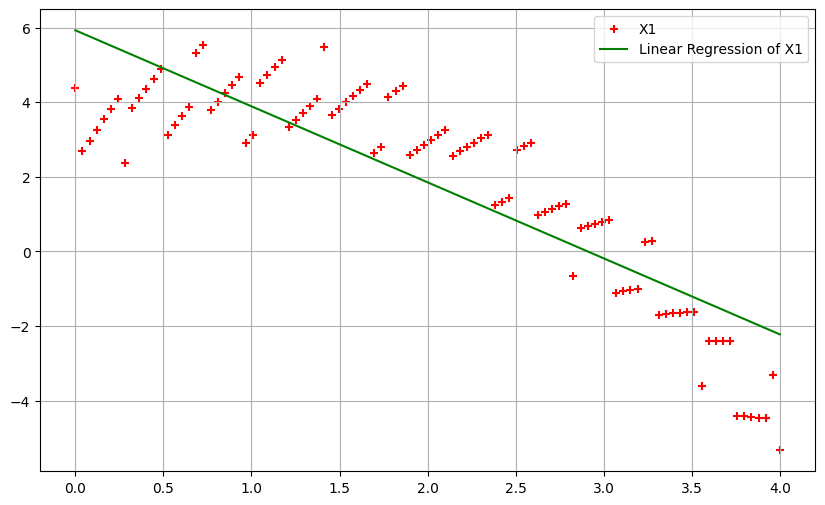

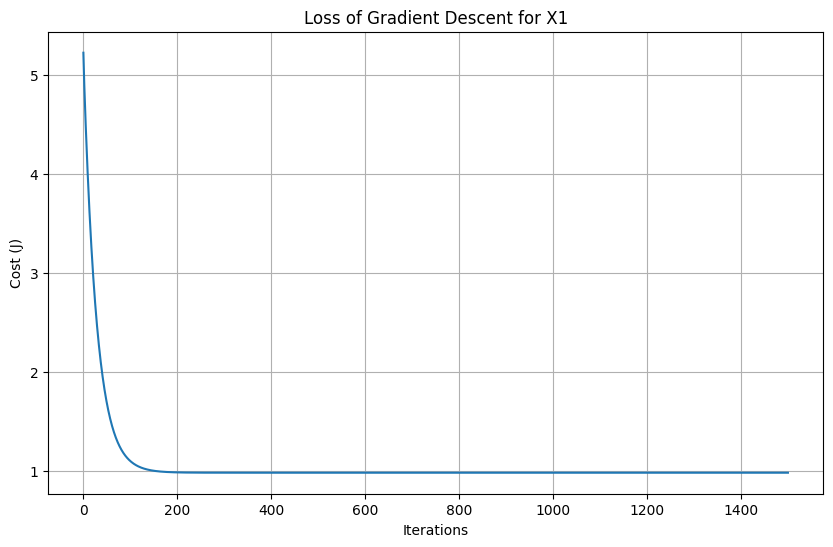

In [ ]:
#scatter plot of training data
plt.scatter(X_1[:,1], Y, color='red', marker = '+', label = 'X1')
plt.rcParams["figure.figsize"] = (10,6)
#line plot of linear regression
plt.plot(X_1[:,1], X_1.dot(theta_1), color='green', label = 'Linear Regression of X1')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid(True)
plt.legend()
plt.show()

plt.plot(cost_history_1)
plt.grid(True)
plt.title('Loss of Gradient Descent for X1')
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.show()

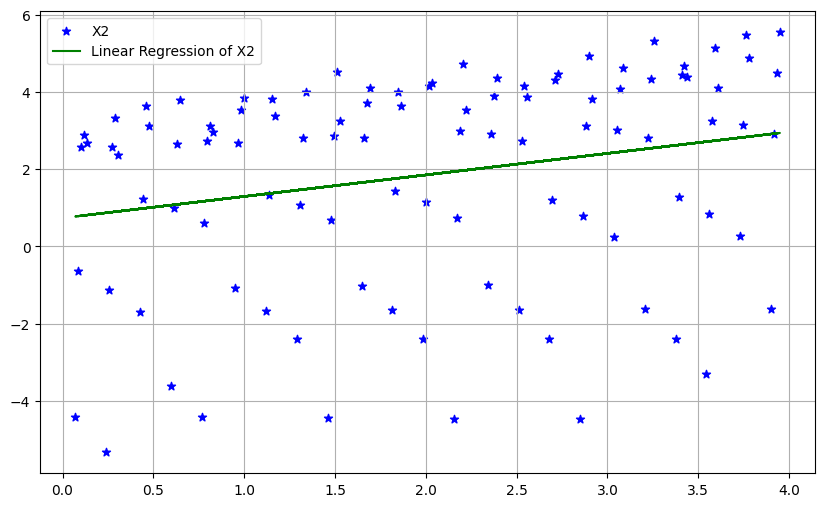

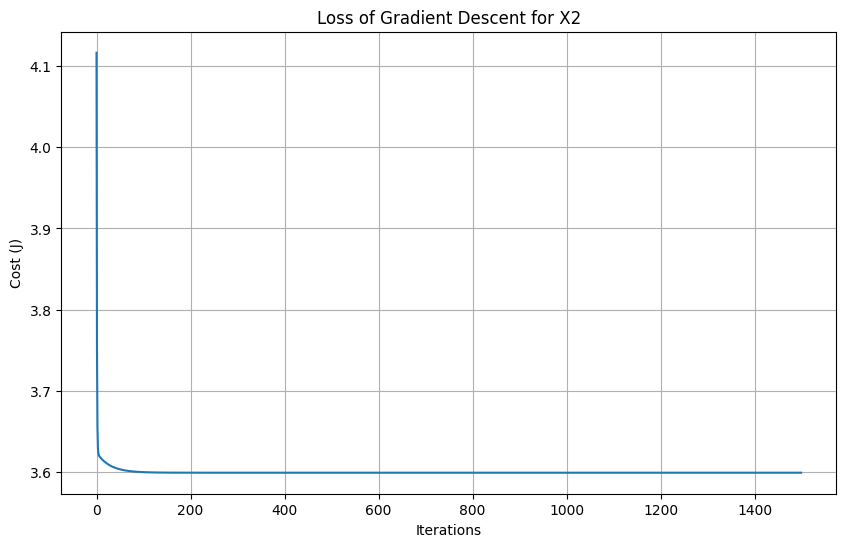

In [ ]:
#scatter plot of training data
plt.scatter(X_2[:,1], Y, color='blue', marker = '*', label = 'X2')
plt.rcParams["figure.figsize"] = (10,6)
#line plot of linear regression
plt.plot(X_2[:,1], X_2.dot(theta_2), color='green', label = 'Linear Regression of X2')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid(True)
plt.legend()
plt.show()

plt.plot(cost_history_2)
plt.grid(True)
plt.title('Loss of Gradient Descent for X2')
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.show()

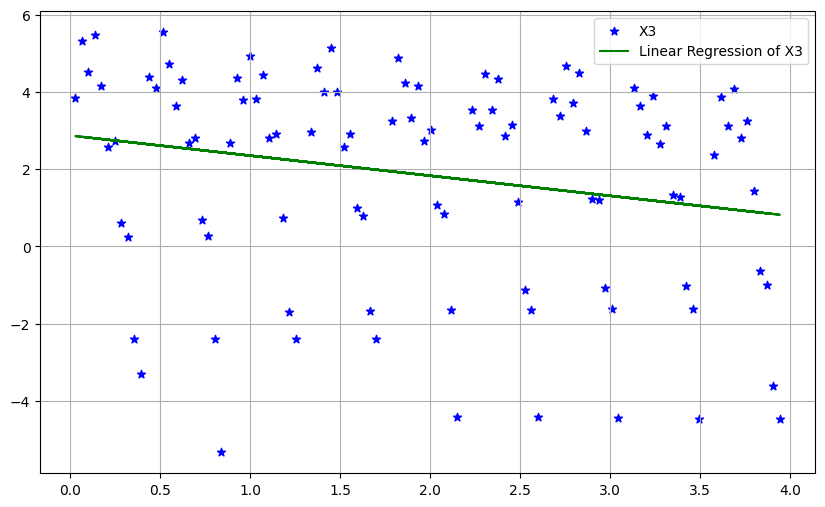

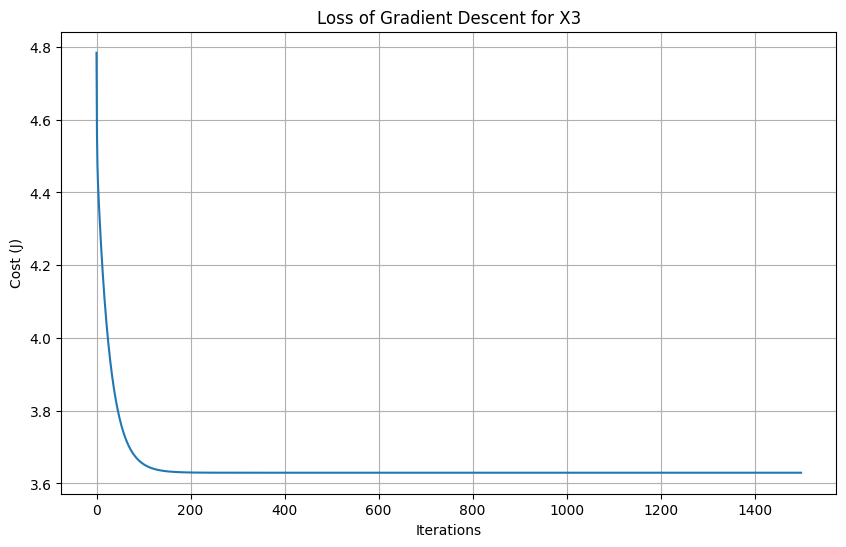

In [ ]:
#scatter plot of training data
plt.scatter(X_3[:,1], Y, color='blue', marker = '*', label = 'X3')
plt.rcParams["figure.figsize"] = (10,6)
#line plot of linear regression
plt.plot(X_3[:,1], X_3.dot(theta_3), color='green', label = 'Linear Regression of X3')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid(True)
plt.legend()
plt.show()

plt.plot(cost_history_3)
plt.grid(True)
plt.title('Loss of Gradient Descent for X3')
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.show()

In [ ]:
#Problem 2
#Create a combined 2d array of all training data
X_total = np.hstack((X_0,X1.reshape(m,1),X2.reshape(m,1), X3.reshape(m,1)))
#training variables
theta_total = np.zeros(4)
alpha_total = 0.01
iter_total = 1500

In [ ]:
theta_end, cost_history_total = gradient_descent(X_total, Y, theta_total, alpha_total, iter_total)

#y_total = X_total.dot(theta_total)
#print(X_total)
print(X_total.shape)
print(X_total.dot(theta_total).shape)
#print(y_total)

(100, 4)
(100,)


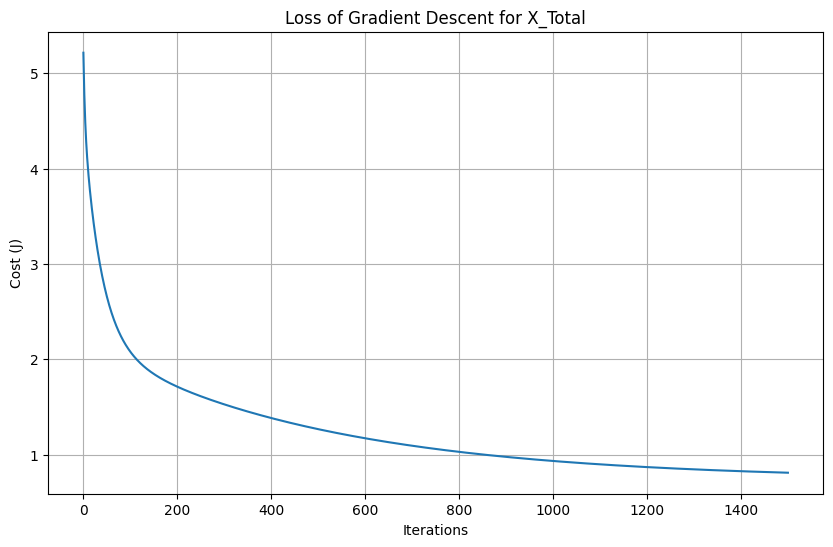

In [ ]:
plt.plot(cost_history_total)
plt.grid(True)
plt.title('Loss of Gradient Descent for X_Total')
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.show()

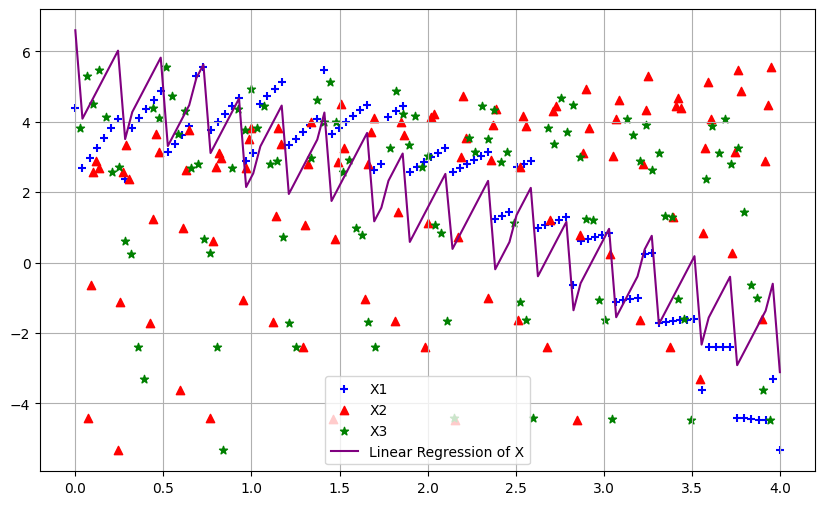

In [ ]:
plt.scatter(X_1[:,1], Y, color='blue', marker = '+', label = 'X1')
plt.scatter(X_2[:,1], Y, color='red', marker = '^', label = 'X2')
plt.scatter(X_3[:,1], Y, color='green', marker = '*', label = 'X3')
plt.plot(X_total[:,1], X_total.dot(theta_total), color='purple', label = 'Linear Regression of X')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid(True)
plt.legend()
plt.show()